In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


In [15]:
pip install scikit-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [5]:
train_data = pd.read_csv("train.csv")
unique_data = pd.read_csv("unique_m.csv")


In [6]:
train_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [7]:
print(train_data.info)
print(train_data.shape)
train_data.info

<bound method DataFrame.info of        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.18179

<bound method DataFrame.info of        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.18179

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [20]:
train_data.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [9]:
def correlationCoefficient(X, Y, n) : 
    sum_X = 0.0
    sum_Y = 0.0
    sum_XY = 0.0
    squareSum_X = 0.0
    squareSum_Y = 0.0
      
      
    i = 0
    while i < n : 
        # sum of elements of array X. 
        sum_X = sum_X + X[i] 
          
        # sum of elements of array Y. 
        sum_Y = sum_Y + Y[i] 
          
        # sum of X[i] * Y[i]. 
        sum_XY = sum_XY + X[i] * Y[i] 
          
        # sum of square of array elements. 
        squareSum_X = squareSum_X + X[i] * X[i] 
        squareSum_Y = squareSum_Y + Y[i] * Y[i] 
          
        i = i + 1
       
    # use formula for calculating correlation  
    # coefficient. 
    corr = (float)(n * sum_XY - sum_X * sum_Y)/(float)(math.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - 
           sum_Y * sum_Y))) 
    return corr 
      


In [10]:
#data cleaning


integer=0
string='NaN'
Float=0.0
integercolumn=['number_of_elements','range_atomic_radius','range_Valence']
floatinteger=['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
       'critical_temp']
stringinteger=[]

for i in train_data:
    if i in integercolumn:
        train_data[i]=train_data[i].fillna(integer)
    elif i in floatinteger:
        train_data[i]=train_data[i].fillna(string)
    elif i in stringinteger:
        train_data[i]=train_data[i].fillna(Float)
    else :
        print("ERROR: i %s couldn't Recognised" % i)
        
        

train_data[train_data==np.inf]=0.0
train_data.fillna(train_data.mean(), inplace=True)
train_data      

ERROR: i range_atomic_mass couldn't Recognised


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [11]:
#data cleaning


integer=0
string='NaN'
Float=0.0
integercolumn=['number_of_element','range_atomic_radius','range_Valence']
floatinteger=['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
       'critical_temp']
stringinteger=[]

for i in train_data:
    if i in integercolumn:
        train_data[i]=train_data[i].fillna(integer)
    elif i in floatinteger:
        train_data[i]=train_data[i].fillna(string)
    elif i in stringinteger:
        train_data[i]=train_data[i].fillna(Float)
    else :
        print("ERROR: i %s couldn't Recognised" % i)
        
        

train_data[train_data==np.inf]=0.0
train_data.fillna(train_data.mean(), inplace=True)
train_data      

ERROR: i number_of_elements couldn't Recognised
ERROR: i range_atomic_mass couldn't Recognised


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [12]:
# Convert specific columns from int to float
columns_to_convert = ['number_of_elements','range_atomic_radius','range_Valence']

train_data[columns_to_convert] = train_data[columns_to_convert].astype(float)

In [13]:
train_data.corr().T

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [14]:
x=train_data
y=train_data[["critical_temp"]]
print(x)
print(y)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                     4.0         88.944468             57.862692   
1                     5.0         92.729214             58.518416   
2                     4.0         88.944468             57.885242   
3                     4.0         88.944468             57.873967   
4                     4.0         88.944468             57.840143   
...                   ...               ...                   ...   
21258                 4.0        106.957877             53.095769   
21259                 5.0         92.266740             49.021367   
21260                 2.0         99.663190             95.609104   
21261                 2.0         99.663190             97.095602   
21262                 3.0         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

In [15]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
y_scaled=preprocessing.scale(y)
y_scaled=pd.DataFrame(y_scaled,columns=y.columns)


In [16]:
x_scaled

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,...,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.837959,-0.406166,-0.838372,-0.520070,-0.158267
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,...,-0.752156,-1.116731,-0.719454,0.664971,-0.014779,-0.033011,-0.362352,-0.426866,-0.450821,-0.245849
2,-0.080058,0.046733,-0.450978,-0.158850,-0.611658,0.044358,-0.218984,0.133725,0.093294,0.378186,...,-0.740164,-0.805912,-0.700728,0.186292,-0.062235,-0.837959,-0.376957,-0.838372,-0.503304,-0.450208
3,-0.080058,0.046733,-0.451314,-0.158850,-0.611739,0.044358,-0.103615,0.133725,0.020128,0.378186,...,-0.746160,-0.805912,-0.706224,0.186292,-0.010538,-0.837959,-0.391562,-0.838372,-0.511524,-0.362626
4,-0.080058,0.046733,-0.452324,-0.158850,-0.611980,0.044358,0.162775,0.133725,-0.199372,0.378186,...,-0.764149,-0.805912,-0.722618,0.186292,0.113627,-0.837959,-0.435376,-0.838372,-0.538178,-0.333432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.080058,0.653740,-0.593991,0.361744,-0.420307,0.031615,0.473913,0.572626,-0.657124,1.066745,...,0.337829,0.159787,0.394987,0.208923,-0.366001,-0.837959,0.701200,-0.838372,-0.388706,-0.933661
21259,0.614744,0.158685,-0.715653,-0.208768,-0.700465,0.432089,1.264895,1.332391,-0.959386,1.239871,...,-0.928046,-0.848370,-0.865598,0.759220,0.747878,-0.837959,-0.591160,-0.906487,-1.011981,2.559699
21260,-1.469660,0.407927,0.675457,0.906983,1.007482,-1.300993,-1.329515,-1.868861,0.734817,-1.878471,...,1.382509,1.353046,1.469098,-1.548333,-1.583774,-0.837959,1.755341,-0.700159,-0.601416,-0.947091
21261,-1.469660,0.407927,0.719844,0.906983,1.046684,-1.300993,-1.053776,-1.868861,-0.078244,-1.878471,...,1.290167,1.353046,1.370404,-1.548333,-1.249706,-0.837959,0.743230,-0.700159,-0.464240,-0.951178


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(14884, 82)
(6379, 82)


In [20]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
import math

Mean Absolute Error: 4.749691981210105e-15
Root Mean Squared Error: 6.369022071537318e-15
variance: 1.0
      Actual  Predicted
0   0.081124   0.081124
1  -0.874689  -0.874689
2   0.192061   0.192061
3   1.943704   1.943704
4  -0.479402  -0.479402
5  -0.304238  -0.304238
6  -0.134912  -0.134912
7   0.997817   0.997817
8  -0.129073  -0.129073
9  -0.523193  -0.523193
10 -0.992341  -0.992341
11  0.072366   0.072366
12 -0.566984  -0.566984
13  2.644361   2.644361
14  2.912947   2.912947
15 -0.727551  -0.727551
16  0.162867   0.162867
17 -0.639969  -0.639969
18  1.666361   1.666361
19 -0.867683  -0.867683


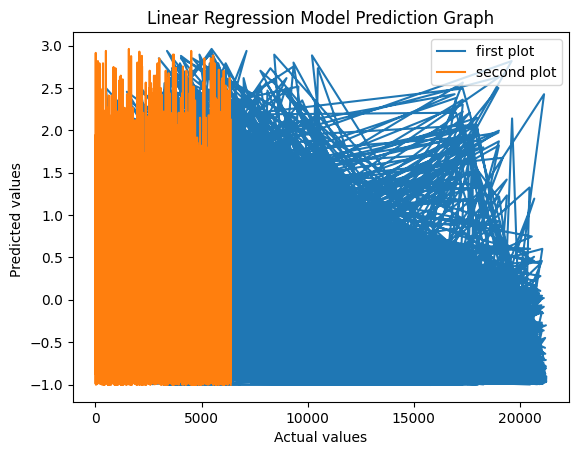

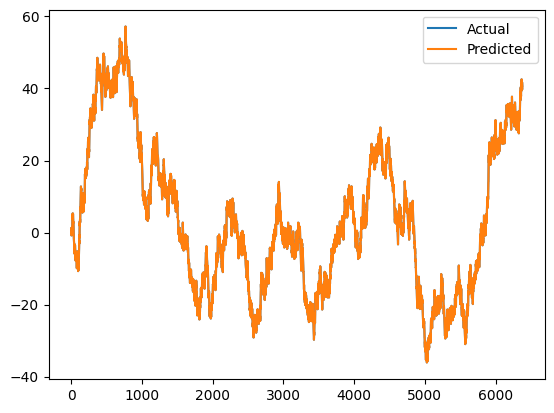

In [23]:
regression_model=linear_model.LinearRegression()
from sklearn.metrics import r2_score

regression_model.fit(X_train,Y_train)
y_pred=regression_model.predict(X_test)


MAE_LR=metrics.mean_absolute_error(Y_test, y_pred) 
SQRT_LR=np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
VARIENCE_LR=explained_variance_score(Y_test, y_pred)
#CC_LR=correlationCoefficient(Y_test, y_pred,len(Y_test) )
r_squared = r2_score(Y_test, y_pred)


print('Mean Absolute Error:', MAE_LR)  
print('Root Mean Squared Error:',SQRT_LR )
print ('variance:',VARIENCE_LR)
#print ('correlation coefficient',CC_LR)



df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(20))




# Plotting graph


plt.plot(Y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Linear Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();

Mean Absolute Error (Ridge): 3.1011983279129544e-05
Root Mean Squared Error (Ridge): 4.080673927775088e-05
Variance (Ridge): 0.9999999983074812
R2 Value 0.999999998307033
      Actual  Predicted
0   0.081124   0.081101
1  -0.874689  -0.874704
2   0.192061   0.192052
3   1.943704   1.943684
4  -0.479402  -0.479358
5  -0.304238  -0.304226
6  -0.134912  -0.134858
7   0.997817   0.997811
8  -0.129073  -0.128983
9  -0.523193  -0.523144
10 -0.992341  -0.992318
11  0.072366   0.072327
12 -0.566984  -0.566985
13  2.644361   2.644314
14  2.912947   2.912876
15 -0.727551  -0.727575
16  0.162867   0.162886
17 -0.639969  -0.639959
18  1.666361   1.666302
19 -0.867683  -0.867708


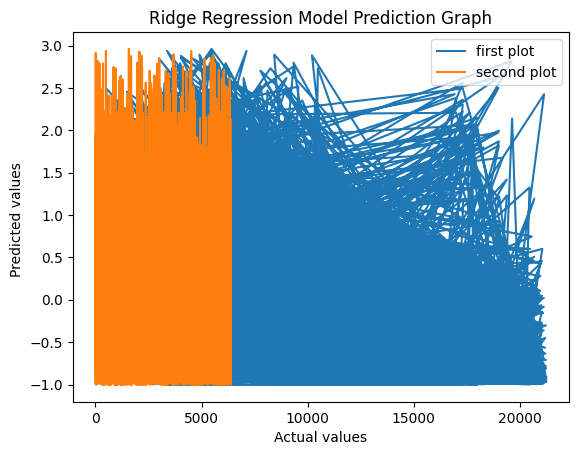

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_model = Ridge(alpha=0.3)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, Y_train)
y_pred = ridge_model.predict(X_test)

MAE_Ridge = metrics.mean_absolute_error(Y_test, y_pred) 
SQRT_Ridge = math.sqrt(metrics.mean_squared_error(Y_test, y_pred))
VARIENCE_Ridge = explained_variance_score(Y_test, y_pred)
#CC_Ridge = correlationCoefficient(Y_test, y_pred, len(Y_test))
r_squared = r2_score(Y_test, y_pred)


print('Mean Absolute Error (Ridge):', MAE_Ridge)  
print('Root Mean Squared Error (Ridge):', SQRT_Ridge)
print('Variance (Ridge):', VARIENCE_Ridge)
#print('Correlation Coefficient (Ridge):', CC_Ridge)
print('R2 Value',r_squared)



plt.plot(Y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Ridge Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()



df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(20))



Mean Absolute Error (Ridge): 0.0002403932178663722
Root Mean Squared Error (Ridge): 0.001025955046726315
Variance (Ridge): 0.9999989306314866
R2 Value 0.9999989298581186


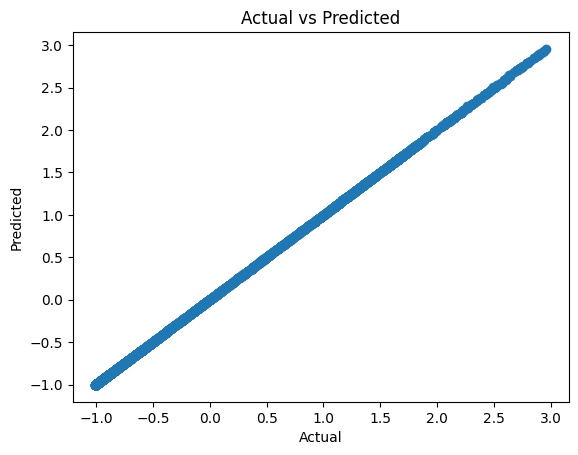

      Actual  Predicted
0   0.081124   0.078204
1  -0.874689  -0.874689
2   0.192061   0.192061
3   1.943704   1.943704
4  -0.479402  -0.479402
5  -0.304238  -0.304238
6  -0.134912  -0.134912
7   0.997817   0.997817
8  -0.129073  -0.129073
9  -0.523193  -0.523193
10 -0.992341  -0.992341
11  0.072366   0.072366
12 -0.566984  -0.566984
13  2.644361   2.641442
14  2.912947   2.907108
15 -0.727551  -0.727551
16  0.162867   0.162867
17 -0.639969  -0.639969
18  1.666361   1.666361
19 -0.867683  -0.867683


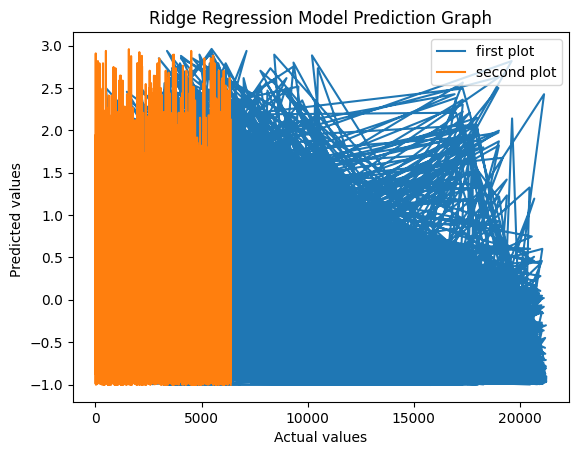

In [25]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)

MAE_DT = metrics.mean_absolute_error(Y_test, y_pred) 
SQRT_DT = math.sqrt(metrics.mean_squared_error(Y_test, y_pred))
VARIENCE_DT = explained_variance_score(Y_test, y_pred)
#CC_DT = correlationCoefficient(Y_test, y_pred, len(Y_test))
r_squared = r2_score(Y_test, y_pred)


MAE_Ridge = metrics.mean_absolute_error(Y_test, y_pred) 
SQRT_Ridge = math.sqrt(metrics.mean_squared_error(Y_test, y_pred))
VARIENCE_Ridge = explained_variance_score(Y_test, y_pred)
#CC_Ridge = correlationCoefficient(Y_test, y_pred, len(Y_test))

print('Mean Absolute Error (Ridge):', MAE_Ridge)  
print('Root Mean Squared Error (Ridge):', SQRT_Ridge)
print('Variance (Ridge):', VARIENCE_Ridge)
#print('Correlation Coefficient (Ridge):', CC_Ridge)
print('R2 Value',r_squared)


plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


plt.plot(Y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Ridge Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()




df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(20))




C:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (Gradient Boosting): 0.003936828782948355
Root Mean Squared Error (Gradient Boosting): 0.005904964915033194
Variance (Gradient Boosting): 0.9999645506864961
R2 Value 0.9999645497469223


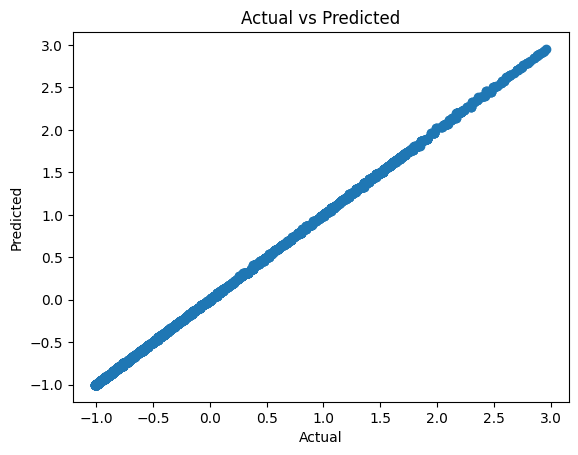

      Actual  Predicted
0   0.081124   0.081072
1  -0.874689  -0.868829
2   0.192061   0.189338
3   1.943704   1.961219
4  -0.479402  -0.479472
5  -0.304238  -0.301819
6  -0.134912  -0.130595
7   0.997817   0.980230
8  -0.129073  -0.129173
9  -0.523193  -0.520662
10 -0.992341  -0.992507
11  0.072366   0.075013
12 -0.566984  -0.563662
13  2.644361   2.641890
14  2.912947   2.905763
15 -0.727551  -0.729137
16  0.162867   0.163580
17 -0.639969  -0.639917
18  1.666361   1.661060
19 -0.867683  -0.868888


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
y_pred = gb_model.predict(X_test)

MAE_GB = metrics.mean_absolute_error(Y_test, y_pred) 
SQRT_GB = math.sqrt(metrics.mean_squared_error(Y_test, y_pred))
VARIENCE_GB = explained_variance_score(Y_test, y_pred)
#CC_GB = correlationCoefficient(Y_test, y_pred, len(Y_test))
r_squared = r2_score(Y_test, y_pred)


print('Mean Absolute Error (Gradient Boosting):', MAE_GB)  
print('Root Mean Squared Error (Gradient Boosting):', SQRT_GB)
print('Variance (Gradient Boosting):', VARIENCE_GB)
#print('Correlation Coefficient (Gradient Boosting):', CC_GB)
print('R2 Value',r_squared)


# Plotting the graph
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(20))


In [27]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)


In [28]:
get_score(DecisionTreeRegressor(),X_train,X_test,Y_train,Y_test)

0.9999990352412121

In [29]:
get_score(LinearRegression(),X_train,X_test,Y_train,Y_test)

1.0

In [30]:
import numpy as np 
np.unique(train_data.target)

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
train_data.info()

In [ ]:
train_data

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.1, 1), copy=False)
scaled_data=scaler.fit(train_data)
print(scaled_data)
transformed_data=scaler.transform(train_data)
transformed_data1=np.delete(transformed_data,np.s_[-1],axis=1)
print(transformed_data1)
y = np.array(transformed_data[:,-1])
print(transformed_data)
print(transformed_data1)
print(y)
np.savetxt("scaleddata.csv", y, delimiter=",")


MinMaxScaler(copy=False, feature_range=(0.1, 1))
[[0.4375     0.46529073 0.32855457 ... 0.23974756 0.22990381 0.23111764]
 [0.55       0.48215018 0.33146808 ... 0.24526391 0.28973666 0.24058188]
 [0.4375     0.46529073 0.32865476 ... 0.24342512 0.22990381 0.23340899]
 ...
 [0.2125     0.51303811 0.49626923 ... 0.51188753 0.25       0.22      ]
 [0.2125     0.51303811 0.50287404 ... 0.38445983 0.25       0.23874797]
 [0.325      0.45871518 0.4573886  ... 0.33168674 0.52426407 0.55      ]]
[[0.4375     0.46529073 0.32855457 ... 0.22990381 0.23111764 0.24108022]
 [0.55       0.48215018 0.33146808 ... 0.28973666 0.24058188 0.22648561]
 [0.4375     0.46529073 0.32865476 ... 0.22990381 0.23340899 0.19243152]
 ...
 [0.2125     0.51303811 0.49626923 ... 0.25       0.22       0.10963142]
 [0.2125     0.51303811 0.50287404 ... 0.25       0.23874797 0.10895034]
 [0.325      0.45871518 0.4573886  ... 0.52426407 0.55       0.16226932]]
[[0.4375     0.46529073 0.32855457 ... 0.23974756 0.22990381 0.

[[-0.69060322  1.24583654 -0.01260241 ... -0.20724087  0.16030751
  -0.28003168]
 [-0.86725618  0.63734017 -0.31535918 ...  0.63150069 -0.1408223
   0.31350803]
 [-0.65926725  1.29675377 -0.00459403 ... -0.07230773  0.3117121
  -0.24746969]
 ...
 [ 1.81390924  0.36235288 -0.37780661 ... -0.25766758  0.46525891
   0.34787376]
 [ 1.7248927   0.16839034 -0.34795443 ... -0.892973   -0.24422202
   0.19808802]
 [ 0.95314268 -0.4249634   0.09417373 ... -0.46054708 -0.73843149
  -0.79712235]]


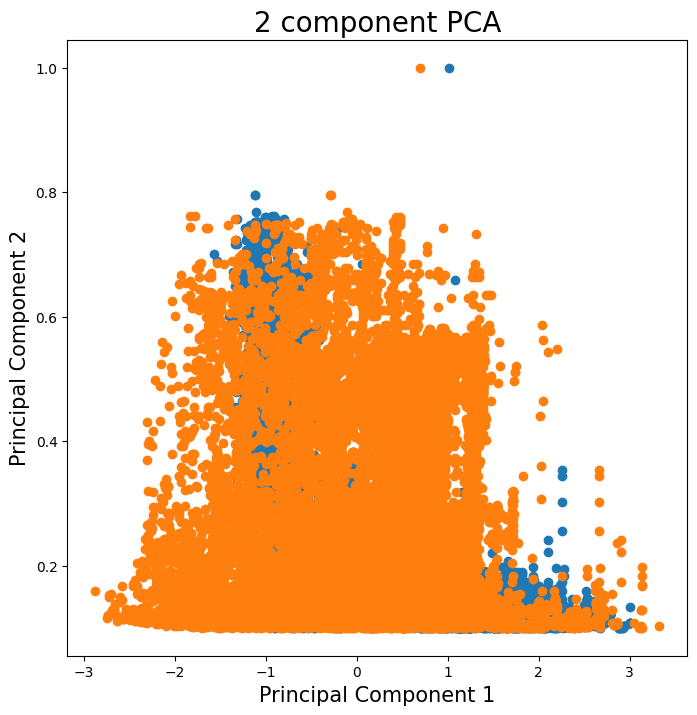

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10, whiten=True).fit(transformed_data1)
new_data = pca.transform(transformed_data1)
print(new_data)

# PCA scatter plot


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(new_data[:, 0] ,y)    
ax.scatter(new_data[:, 1] ,y)

In [38]:
import csv
new_data1=pd.DataFrame(new_data,y)
print(new_data1.head(5))
outfile = open("./PCAdata.csv", "w")
writer = csv.writer(outfile)
writer.writerow([ "Critical Temperature","PCA1 ", "PCA2 "])
np.savetxt("new_PCAdata.csv", new_data, delimiter=",")


                 0         1         2         3         4         5  \
0.241080 -0.690603  1.245837 -0.012602  0.536536 -0.187963  0.034913   
0.226486 -0.867256  0.637340 -0.315359  0.037370  0.169165 -0.591799   
0.192432 -0.659267  1.296754 -0.004594  0.587721 -0.166984  0.003952   
0.207026 -0.675892  1.269333 -0.009361  0.560605 -0.177993  0.019445   
0.211891 -0.715901  1.207318 -0.015903  0.494915 -0.205785  0.065865   

                 6         7         8         9  
0.241080 -0.220795 -0.207241  0.160308 -0.280032  
0.226486 -0.540046  0.631501 -0.140822  0.313508  
0.192432 -0.245176 -0.072308  0.311712 -0.247470  
0.207026 -0.232764 -0.142929  0.232525 -0.264176  
0.211891 -0.197824 -0.322301  0.030715 -0.309722  


In [39]:
pca.explained_variance_ratio_


from sklearn.model_selection import KFold


kfold=KFold(n_splits=10 ,shuffle=True, random_state=10)
for train_index, test_index in kfold.split(new_data):
    print("Train:", train_index, "Validation:",test_index)
    X_trains, X_tests = new_data[train_index], new_data[test_index] 
    y_trains, y_tests = y[train_index], y[test_index]


Train: [    0     1     2 ... 21260 21261 21262] Validation: [    7    16    27 ... 21237 21248 21252]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [    9    13    31 ... 21205 21219 21240]
Train: [    1     2     3 ... 21259 21260 21262] Validation: [    0    40    42 ... 21254 21257 21261]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [   22    45    55 ... 21243 21256 21259]
Train: [    0     1     2 ... 21259 21261 21262] Validation: [    8    24    32 ... 21233 21250 21260]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [    5    10    21 ... 21225 21226 21227]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [    3     6    12 ... 21230 21249 21253]
Train: [    0     1     2 ... 21259 21260 21261] Validation: [    4    15    19 ... 21255 21258 21262]
Train: [    0     2     3 ... 21260 21261 21262] Validation: [    1    11    18 ... 21236 21238 21246]
Train: [    0     1     3 ... 21260 21261 21262] Validation: [    2    23

Mean Absolute Error: 0.08708477071401359
Root Mean Squared Error: 0.10985751045477705
variance: 0.5586623394711241
correlation coefficient 0.7474416668176339
R2 Value 0.5577902284767171
      Actual  Predicted
0   0.192432   0.363801
1   0.188540   0.366022
2   0.282432   0.363692
3   0.553405   0.425087
4   0.552432   0.381676
5   0.226486   0.366823
6   0.255675   0.348924
7   0.537837   0.391196
8   0.559729   0.392672
9   0.549999   0.386165
10  0.275134   0.440078
11  0.513513   0.400086
12  0.357837   0.374402
13  0.549513   0.447282
14  0.559729   0.374758
15  0.314053   0.440059
16  0.541729   0.434639
17  0.421080   0.392253
18  0.560702   0.392672
19  0.309432   0.388964


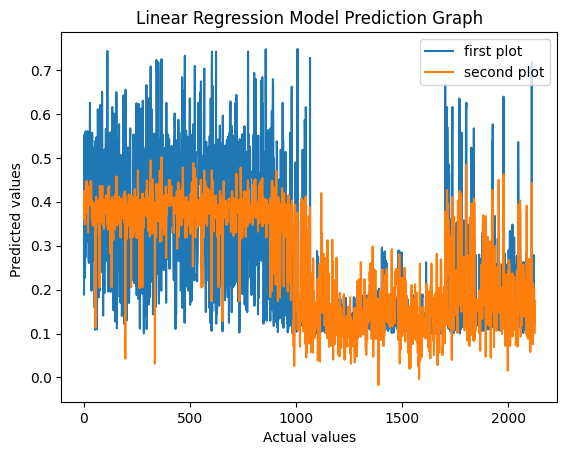

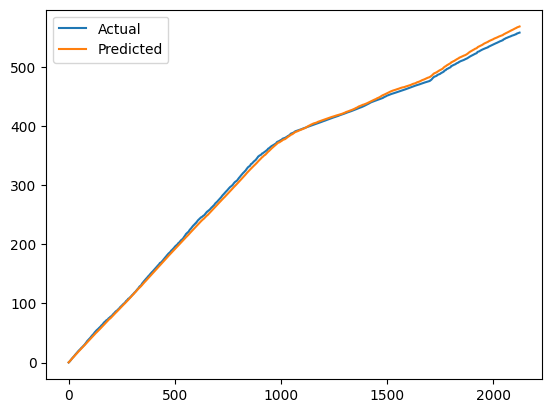

In [40]:
from sklearn.metrics import r2_score

regression_model.fit(X_trains,y_trains)
y_pred=regression_model.predict(X_tests)


MAE_LR=metrics.mean_absolute_error(y_tests, y_pred) 
SQRT_LR=np.sqrt(metrics.mean_squared_error(y_tests, y_pred))
VARIENCE_LR=explained_variance_score(y_tests, y_pred)
CC_LR=correlationCoefficient(y_tests, y_pred,len(y_tests) )
r_squared = r2_score(y_tests, y_pred)


print('Mean Absolute Error:', MAE_LR)  
print('Root Mean Squared Error:',SQRT_LR )
print ('variance:',VARIENCE_LR)
print ('correlation coefficient',CC_LR)
print('R2 Value',r_squared)



b1 = y_tests.ravel()
c1 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b1, 'Predicted': c1})   
print(df.head(20)) 


# Plotting graph


plt.plot(y_tests, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Linear Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();

Mean Absolute Error (Ridge): 0.08708471437866107
Root Mean Squared Error (Ridge): 0.10985751883862226
Variance (Ridge): 0.5586622757954649
Correlation Coefficient (Ridge): 0.7474416645953784
R2 Value 0.5577901609816792
      Actual  Predicted
0   0.192432   0.363799
1   0.188540   0.366020
2   0.282432   0.363691
3   0.553405   0.425084
4   0.552432   0.381675
5   0.226486   0.366821
6   0.255675   0.348923
7   0.537837   0.391195
8   0.559729   0.392670
9   0.549999   0.386163
10  0.275134   0.440076
11  0.513513   0.400084
12  0.357837   0.374400
13  0.549513   0.447279
14  0.559729   0.374756
15  0.314053   0.440056
16  0.541729   0.434636
17  0.421080   0.392251
18  0.560702   0.392670
19  0.309432   0.388963


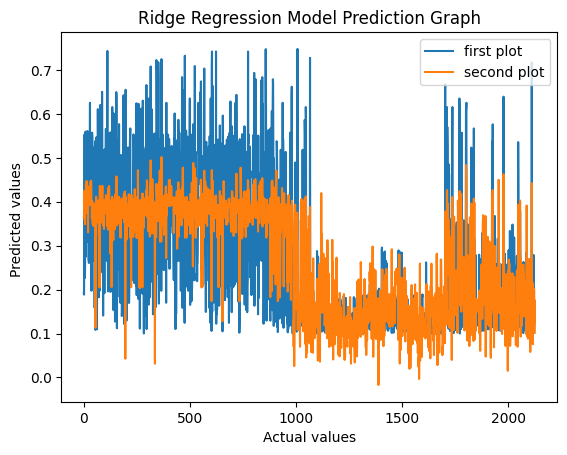

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_model = Ridge(alpha=0.3)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_trains, y_trains)
y_pred = ridge_model.predict(X_tests)

MAE_Ridge = metrics.mean_absolute_error(y_tests, y_pred) 
SQRT_Ridge = math.sqrt(metrics.mean_squared_error(y_tests, y_pred))
VARIENCE_Ridge = explained_variance_score(y_tests, y_pred)
CC_Ridge = correlationCoefficient(y_tests, y_pred, len(y_tests))
r_squared = r2_score(y_tests, y_pred)


print('Mean Absolute Error (Ridge):', MAE_Ridge)  
print('Root Mean Squared Error (Ridge):', SQRT_Ridge)
print('Variance (Ridge):', VARIENCE_Ridge)
print('Correlation Coefficient (Ridge):', CC_Ridge)
print('R2 Value',r_squared)



plt.plot(y_tests, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Ridge Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()


b1 = y_tests.ravel()
c1 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b1, 'Predicted': c1})   
print(df.head(20)) 



Mean Absolute Error (Decision Tree): 0.03206096416217444
Root Mean Squared Error (Decision Tree): 0.06428018843160531
Variance (Decision Tree): 0.8486645633692527
Correlation Coefficient (Decision Tree): 0.9238939085474155
R2 Value 0.8486009634929987


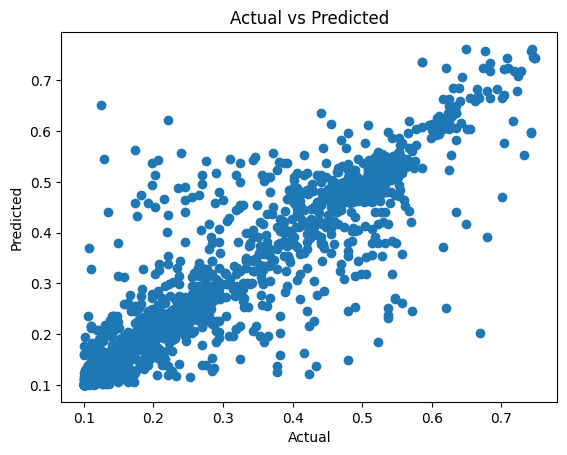

      Actual  Predicted
0   0.192432   0.245945
1   0.188540   0.182910
2   0.282432   0.248986
3   0.553405   0.540756
4   0.552432   0.557297
5   0.226486   0.189026
6   0.255675   0.279999
7   0.537837   0.517995
8   0.559729   0.535405
9   0.549999   0.554864
10  0.275134   0.289729
11  0.513513   0.356378
12  0.357837   0.362702
13  0.549513   0.528108
14  0.559729   0.464864
15  0.314053   0.289729
16  0.541729   0.511045
17  0.421080   0.330351
18  0.560702   0.535405
19  0.309432   0.545621


In [42]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


dt_model = DecisionTreeRegressor()
dt_model.fit(X_trains, y_trains)
y_pred = dt_model.predict(X_tests)

MAE_DT = metrics.mean_absolute_error(y_tests, y_pred) 
SQRT_DT = math.sqrt(metrics.mean_squared_error(y_tests, y_pred))
VARIENCE_DT = explained_variance_score(y_tests, y_pred)
CC_DT = correlationCoefficient(y_tests, y_pred, len(y_tests))
r_squared = r2_score(y_tests, y_pred)


print('Mean Absolute Error (Decision Tree):', MAE_DT)  
print('Root Mean Squared Error (Decision Tree):', SQRT_DT)
print('Variance (Decision Tree):', VARIENCE_DT)
print('Correlation Coefficient (Decision Tree):', CC_DT)
print('R2 Value',r_squared)


# Plotting the graph
plt.scatter(y_tests, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()




b1 = y_tests.ravel()
c1 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b1, 'Predicted': c1})   
print(df.head(20)) 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_trains, y_trains)

y_pred = GBoost.predict(X_tests)

MAE_GB=metrics.mean_absolute_error(y_tests, y_pred) 
SQRT_GB=np.sqrt(metrics.mean_squared_error(y_tests, y_pred))
VARIENCE_GB=explained_variance_score(y_tests, y_pred)
CC_GB=correlationCoefficient(y_tests, y_pred,len(y_tests) )
r_squared = r2_score(y_tests, y_pred)


print('Mean Absolute Error:', MAE_GB)   
print('Root Mean Squared Error:',SQRT_GB )
print ('variance:',VARIENCE_GB)
print ('correlation coefficient',CC_GB)
print('R2 Value',r_squared)

# visulizing distance

b4 = y_tests.ravel()
c4 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b4, 'Predicted': c4})   
print(df.head(20)) 

#Plotting Graph

# plt.plot(y_test, label='first plot')
# plt.plot(y_pred, label='second plot')
# plt.title("Gradient Boosting Model Prediction Graph")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values ")
# plt.legend()

# # Graph 

# df = df.cumsum();
# df.plot();
plt.scatter(y_tests, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)
get_score(LinearRegression(),X_train,X_test,y_train,y_test)
get_score(GradientBoostingRegressor(),X_train,X_test,y_train,y_test)